[View in Colaboratory](https://colab.research.google.com/github/sumeshsharma1/cbeh193honors/blob/master/Jakstat_Benchmark.ipynb)

float64
(8, 501, 1000)


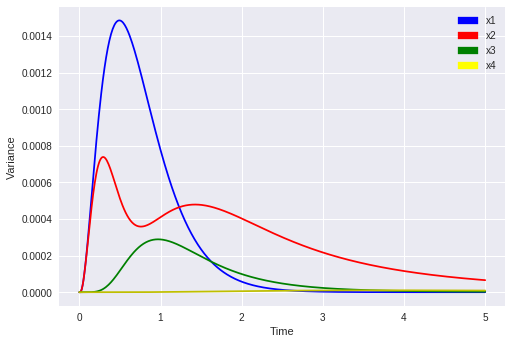

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
n_simulations = 1000; #Varied for accuracy
k3 = .1066; k4 = .10658; tau = 6.4; epo = 100; #Setting constants
tstep = .01;
t = np.linspace(0, 5, num=501)
steps = len(t)
x = np.zeros((8,steps,n_simulations),dtype=np.float64)
xp = np.zeros((8,steps,n_simulations),dtype=np.float64)
print(x.dtype)
print(np.shape(x))
std = np.array([.0021,.246]) #k1 then k2
mean = np.array([.021,2.46])

for i in range(n_simulations):
  x[:,1,i] = 1,0,0,0,0,0,0,0 #Initial conditions
  xp[:,1,i] = x[:,1,i]
  R = []
  R = np.random.randn(1,2); #k1 and k2 have gaussian distributions
  random_par = np.multiply(std,R) + mean
  k1 = random_par[0,0]
  k2 = random_par[0,1]
  for k in range(2,steps):
    xp[0,k,i] = xp[0,k-1,i] + tstep*(-k1*x[0,k-1,i]*epo + 2*k4*x[7,k-1,i]) 
    xp[1,k,i] = xp[1,k-1,i] + tstep*(-k2*((x[1,k-1,i])**2) + k1*x[0,k-1,i]*epo) 
    xp[2,k,i] = xp[2,k-1,i] + tstep*(-k3*x[2,k-1,i] + .5*k2*((x[1,k-1,i])**2)) 
    xp[3,k,i] = xp[3,k-1,i] + tstep*(k3*x[2,k-1,i] - k4*x[7,k-1,i]) 
    xp[4,k,i] = xp[4,k-1,i] + tstep*((4/tau)*(x[2,k-1,i] - x[4,k-1,i]))
    xp[5,k,i] = xp[5,k-1,i] + tstep*((4/tau)*(x[4,k-1,i] - x[5,k-1,i]))
    xp[6,k,i] = xp[6,k-1,i] + tstep*((4/tau)*(x[5,k-1,i] - x[6,k-1,i]))
    xp[7,k,i] = xp[7,k-1,i] + tstep*((4/tau)*(x[6,k-1,i] - x[7,k-1,i]))
    x[:,k,i] = xp[:,k,i]
#Squeeze 3D matrix to 2D matrix
x1sim = np.squeeze(xp[0,:,:])
x2sim = np.squeeze(xp[1,:,:])
x3sim = np.squeeze(xp[2,:,:])
x4sim = np.squeeze(xp[3,:,:])

var1 = np.var(x1sim, axis=1)
var2 = np.var(x2sim, axis=1)
var3 = np.var(x3sim, axis=1)
var4 = np.var(x4sim, axis=1)

np.savetxt('var1.txt',var1)
np.savetxt('var2.txt',var2)
np.savetxt('var3.txt',var3)
np.savetxt('var4.txt',var4)

plt.plot(t,var1,'b-',t,var2,'r-',t,var3,'g-',t,var4,'y-')
plt.xlabel('Time')
plt.ylabel('Variance')

red_line = mpatches.Patch(color ='red', label = 'x2')
blue_line = mpatches.Patch(color ='blue', label ='x1')
green_line = mpatches.Patch(color ='green', label ='x3')
yellow_line = mpatches.Patch(color ='yellow', label ='x4')
plt.legend(handles=[blue_line, red_line, green_line, yellow_line])

plt.show()